In [1]:
import numpy as np
import pandas as pd
import matplotlib

In [2]:
a_df = pd.DataFrame({
    'Country': ['Germany', 'France', 'Belgium', 'Finland'],
    'Population (M)': [82.8, 67.2, 11.4, 5.5],
    'Capital': ['Berlin', 'Paris', 'Brussels', 'Helsinki']
})
a_df

,Country,Population (M),Capital
0,Germany,82.8,Berlin
1,France,67.2,Paris
2,Belgium,11.4,Brussels
3,Finland,5.5,Helsinki


In [3]:
b_df = pd.DataFrame({
    'Country': ['Germany', 'France', 'Belgium', 'Canada'],
    'HDI': [0.936, 0.901, 0.916, 0.926]
})
b_df

,Country,HDI
0,Germany,0.936
1,France,0.901
2,Belgium,0.916
3,Canada,0.926


In [4]:
left_merged_df = a_df.merge(b_df, on='Country', how='left')
left_merged_df

,Country,Population (M),Capital,HDI
0,Germany,82.8,Berlin,0.936
1,France,67.2,Paris,0.901
2,Belgium,11.4,Brussels,0.916
3,Finland,5.5,Helsinki,NaN


In [5]:
right_merged_df = a_df.merge(b_df, on='Country', how='right')
right_merged_df

,Country,Population (M),Capital,HDI
0,Germany,82.8,Berlin,0.936
1,France,67.2,Paris,0.901
2,Belgium,11.4,Brussels,0.916
3,Canada,NaN,NaN,0.926


In [6]:
outer_merged_df = a_df.merge(b_df, on='Country', how='outer')
outer_merged_df

,Country,Population (M),Capital,HDI
0,Germany,82.8,Berlin,0.936
1,France,67.2,Paris,0.901
2,Belgium,11.4,Brussels,0.916
3,Finland,5.5,Helsinki,NaN
4,Canada,NaN,NaN,0.926


In [7]:
aa_df = a_df.set_index("Country")
aa_df

,Population (M),Capital
Country,,
Germany,82.8,Berlin
France,67.2,Paris
Belgium,11.4,Brussels
Finland,5.5,Helsinki


In [8]:
bb_df = b_df.set_index("Country")
bb_df

,HDI
Country,
Germany,0.936
France,0.901
Belgium,0.916
Canada,0.926


In [9]:
aa_df.join(bb_df)

,Population (M),Capital,HDI
Country,,,
Germany,82.8,Berlin,0.936
France,67.2,Paris,0.901
Belgium,11.4,Brussels,0.916
Finland,5.5,Helsinki,NaN


In [10]:
concat_df = pd.concat([a_df, b_df], axis="index", sort=False)
concat_df

,Country,Population (M),Capital,HDI
0,Germany,82.8,Berlin,NaN
1,France,67.2,Paris,NaN
2,Belgium,11.4,Brussels,NaN
3,Finland,5.5,Helsinki,NaN
0,Germany,NaN,NaN,0.936
1,France,NaN,NaN,0.901
2,Belgium,NaN,NaN,0.916
3,Canada,NaN,NaN,0.926


In [11]:
file1 = "dictionary.csv"
countries_df = pd.read_csv(file1)
countries_df.shape

(201, 4)

In [12]:
file2 = "summer.csv"
summer_df = pd.read_csv(file2)
summer_df.rename(columns={"Country": "Code"}, inplace=True)
summer_df.shape

(31165, 9)

In [13]:
file3 = "winter.csv"
winter_df = pd.read_csv(file3)
winter_df.rename(columns={"Country": "Code"}, inplace=True)
winter_df.shape

(5770, 9)

In [14]:
summer_df.head()

,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [15]:
countries_df.head()

,Country,Code,Population,GDP per Capita
0,Afghanistan,AFG,32526562.0,594.323081
1,Albania,ALB,2889167.0,3945.217582
2,Algeria,ALG,39666519.0,4206.031232
3,American Samoa*,ASA,55538.0,NaN
4,Andorra,AND,70473.0,NaN


In [16]:
summer_countries_df = summer_df.merge(countries_df, on = 'Code')
summer_countries_df['Season'] = "Summer"
summer_countries_df.head()

,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country,Population,GDP per Capita,Season
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,Hungary,9844686.0,12363.54346,Summer
1,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,1200M Freestyle,Gold,Hungary,9844686.0,12363.54346,Summer
2,1896,Athens,Athletics,Athletics,"SZOKOLYI, Alajos",HUN,Men,100M,Bronze,Hungary,9844686.0,12363.54346,Summer
3,1896,Athens,Athletics,Athletics,"DANI, Nandor",HUN,Men,800M,Silver,Hungary,9844686.0,12363.54346,Summer
4,1896,Athens,Athletics,Athletics,"KELLNER, Gyula",HUN,Men,Marathon,Bronze,Hungary,9844686.0,12363.54346,Summer


In [17]:
winter_countries_df = winter_df.merge(countries_df, on = 'Code')
winter_countries_df['Season'] = "Winter"
winter_countries_df.head()

,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country,Population,GDP per Capita,Season
0,1924,Chamonix,Biathlon,Biathlon,"BERTHET, G.",FRA,Men,Military Patrol,Bronze,France,66808385.0,36205.568102,Winter
1,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, C.",FRA,Men,Military Patrol,Bronze,France,66808385.0,36205.568102,Winter
2,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, Maurice",FRA,Men,Military Patrol,Bronze,France,66808385.0,36205.568102,Winter
3,1924,Chamonix,Biathlon,Biathlon,"VANDELLE, André",FRA,Men,Military Patrol,Bronze,France,66808385.0,36205.568102,Winter
4,1924,Chamonix,Curling,Curling,"ALDEERT, H.",FRA,Men,Curling,Bronze,France,66808385.0,36205.568102,Winter


In [18]:
all_df = pd.concat([summer_countries_df, winter_countries_df], sort=False)

all_df.tail()

,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country,Population,GDP per Capita,Season
4821,2006,Turin,Skiing,Snowboard,"ZIDEK, Radoslav",SVK,Men,Snowboard Cross,Silver,Slovakia,5424050.0,16088.277587,Winter
4822,2010,Vancouver,Biathlon,Biathlon,"KUZMINA, Anastazia",SVK,Women,10KM Pursuit,Silver,Slovakia,5424050.0,16088.277587,Winter
4823,2010,Vancouver,Biathlon,Biathlon,"HURAJT, Pavol",SVK,Men,15KM Mass Start,Bronze,Slovakia,5424050.0,16088.277587,Winter
4824,2010,Vancouver,Biathlon,Biathlon,"KUZMINA, Anastazia",SVK,Women,7.5KM,Gold,Slovakia,5424050.0,16088.277587,Winter
4825,2014,Sochi,Biathlon,Biathlon,"KUZMINA, Anastazia",SVK,Women,7.5KM,Gold,Slovakia,5424050.0,16088.277587,Winter


In [74]:
df_from_year = all_df['Year'] >= 1984


In [122]:
all_count_df = all_df[df_from_year] \
    .groupby(["Country"]) \
    .count()[["Medal"]] \
    .sort_values(by="Medal", ascending=False)
all_count_df.fillna(0, inplace=True)
all_count_df

,Medal
Country,
United States,2472
Germany,1112
Russia,1031
Australia,891
China,889
...,...
Guatemala,1
Grenada,1
Eritrea,1


In [145]:
all_count_df2 = all_df[df_from_year] \
    .groupby(["Country"]) \
    .count()[["Medal"]] \
    .sort_values(by="Medal", ascending=False)
all_count_df2.fillna(0, inplace=True)
all_count_df2

,Medal
Country,
United States,2472
Germany,1112
Russia,1031
Australia,891
China,889
...,...
Guatemala,1
Grenada,1
Eritrea,1


In [146]:
all_count_df3 = all_df[df_from_year] \
    .groupby(["Country", "Sport"]) \
    .count()[["Medal"]] \
    .sort_values(by="Medal", ascending=False)
#     .sort_values(by=["Sport", "Medal"], ascending=[True,False])
all_count_df3.fillna(0, inplace=True)
all_count_df3

Medal
Country       Sport            
United States Aquatics      615
              Athletics     310
Australia     Aquatics      274
Canada        Ice Hockey    218
United States Basketball    192
...                         ...
India         Tennis          1
Sweden        Triathlon       1
India         Badminton       1
Switzerland   Aquatics        1
Japan         Taekwondo       1

[865 rows x 1 columns]

In [130]:
mypivot = pd.pivot_table(all_count_df2, index= 'Country', columns ='Season', values= "Medal", aggfunc= np.mean)
# mypivot.sort_values(['Medal'], ascending= False)
mypivot.fillna(0, inplace=True)

mypivot['Total'] = mypivot['Summer'] + mypivot['Winter']
# mypivot

result = mypivot.sort_values(('Total'), ascending=False)
result.head(10)

Season,Summer,Winter,Total
Country,,,
United States,2087.0,385.0,2472.0
Germany,785.0,327.0,1112.0
Russia,768.0,263.0,1031.0
Australia,876.0,15.0,891.0
China,807.0,82.0,889.0
Canada,341.0,460.0,801.0
Italy,486.0,146.0,632.0
"Korea, South",500.0,87.0,587.0
France,482.0,105.0,587.0


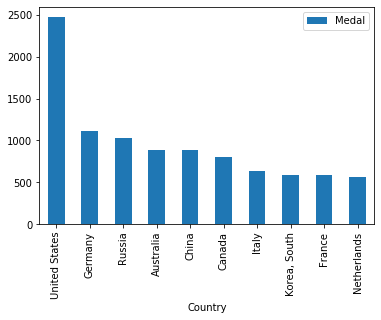

In [25]:
myplot = all_count_df.head(10).plot(kind="bar")
myplot

In [131]:
all_count_df

,Medal
Country,
United States,2472
Germany,1112
Russia,1031
Australia,891
China,889
...,...
Guatemala,1
Grenada,1
Eritrea,1


In [133]:
season_count_df = all_df[all_df['Year']>=1984].groupby(["Country", "Season"])["Medal"].count().unstack()
season_count_df.fillna(0, inplace=True)

season_count_df["Summer"] = season_count_df["Summer"].astype(int)
season_count_df["Winter"] = season_count_df["Winter"].astype(int)
season_count_df.head(10)

Season,Summer,Winter
Country,,
Afghanistan,2,0
Algeria,15,0
Argentina,173,0
Armenia,11,0
Australia,876,15
Austria,28,177
Azerbaijan,26,0
Bahamas,23,0
Bahrain,1,0


In [107]:
season_count_df.columns

Index(['Summer', 'Winter'], dtype='object', name='Season')

In [135]:
season_count_df["Total"] = all_count_df
# season_count_df.columns
season_count_df.sort_values(by="Total", ascending=False)

season_count_df.head(10)


Season,Summer,Winter,Total
Country,,,
Afghanistan,2,0,2
Algeria,15,0,15
Argentina,173,0,173
Armenia,11,0,11
Australia,876,15,891
Austria,28,177,205
Azerbaijan,26,0,26
Bahamas,23,0,23
Bahrain,1,0,1


In [139]:
season_count_df['Gap'] = season_count_df['Total'] - season_count_df['Summer'] - season_count_df['Winter']
season_count_df['Chk Bool'] = season_count_df['Total'] == season_count_df['Summer'] + season_count_df['Winter']
season_count_df

Season,Summer,Winter,Total,Gap,Chk Book,Chk Bool
Country,,,,,,
Afghanistan,2,0,2,0,True,True
Algeria,15,0,15,0,True,True
Argentina,173,0,173,0,True,True
Armenia,11,0,11,0,True,True
Australia,876,15,891,0,True,True
...,...,...,...,...,...,...
Venezuela,7,0,7,0,True,True
Vietnam,2,0,2,0,True,True
Virgin Islands*,1,0,1,0,True,True


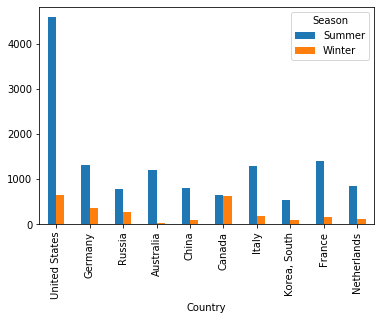

In [112]:
season_count_df.sort_values(by="Total", ascending=False)[["Summer", "Winter"]].head(10).plot(kind="bar")